## Question: What is the worker perception of of prejudice against Mental Health Issues at Work in the Tech Industry in the US?

##### Sub-Questions: How does it vary by Age Group, Company Size, Remote Worker Status, Gender


#### Data set used: Mental Health in Tech Survey from Kaggle
##### https://www.kaggle.com/osmi/mental-health-in-tech-survey

###### Columns:

###### Age: Respondent age
###### Gender: Respondent gender
###### Country:Respondent country
###### state:If you live in the United States, which state or territory do you live in?
###### self_employed: Are you self-employed?
###### family_history: Do you have a family history of mental illness?
###### treatment: Have you sought treatment for a mental health condition?
###### work_interfere: If you have a mental health condition, do you feel that it interferes with your work?
###### no_employees: How many employees does your company or organization have?
###### remote_work: Do you work remotely (outside of an office) at least 50% of the time?
###### tech_company: Is your employer primarily a tech company/organization?
###### benefits: Does your employer provide mental health benefits?
###### care_options: Do you know the options for mental health care your employer provides?
###### wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?
###### seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?
###### anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?
###### leave: How easy is it for you to take medical leave for a mental health condition?
###### mental_health_consequence: Do you think that discussing a mental health issue with your employer would have negative consequences?
###### phys_health_consequence: Do you think that discussing a physical health issue with your employer would have negative consequences?
###### coworkers: Would you be willing to discuss a mental health issue with your coworkers?
###### supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)?
###### mental_health_interview: Would you bring up a mental health issue with a potential employer in an interview?
###### phys_health_interview: Would you bring up a physical health issue with a potential employer in an interview?
###### mental_vs_physical: Do you feel that your employer takes mental health as seriously as physical health?
###### obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?
###### comments:Any additional notes or comments

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('Oranges')
import matplotlib as mpl
mpl.rcParams['font.size'] = 20.0

## Data Reading

In [156]:
mental_raw = pd.read_csv('survey.csv')
mental_raw

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


## NaN Cleaning

In [157]:
mental_raw.isna().sum()/len(mental_raw)
mental_raw.loc[~(mental_raw.comments.isna()),'comments']
# 86% of comments column is NaN and is not structured so dropping it.

mental = mental_raw.drop('comments', axis = 1)
mental

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


In [158]:
mental.isna().sum()

# Column state also has a lot of Nulls. From Kaggle doc this is:
# "If you live in the United States, which state or territory do you live in?"
# The column is only relevant for the US

# Will replace state outside the US for all as 'Not Defined'
# Will replace ones inside the US without state as "Not answered"

mental.loc[mental.Country != 'United States','state'] = 'Not Defined'
mental.loc[(mental.Country == 'United States') & (mental.state.isna()), 'state'] = 'Not Answered'
mental

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,2014-08-27 11:29:44,32,Male,Canada,Not Defined,NaN,No,No,Rarely,6-25,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,2014-08-27 11:29:46,31,Male,United Kingdom,Not Defined,NaN,Yes,Yes,Often,26-100,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,Not Defined,No,No,Yes,NaN,26-100,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


In [159]:
mental.isna().sum()
# work interfere has 21% NaN, will replace with 'Not Answered'

mental.loc[mental.work_interfere.isna(),'work_interfere'] = 'Not Answered'
mental.work_interfere.value_counts()

#Self employed also with some NaN, will put 'Not Answered'
mental.loc[mental.self_employed.isna(),'self_employed'] = 'Not Answered'
mental.self_employed.value_counts()

No              1095
Yes              146
Not Answered      18
Name: self_employed, dtype: int64

## Further Cleaning - Column Values Verification and Normalization

In [160]:
# Change date to datetime and keep only date (remove time)
mental.dtypes
mental.Timestamp = pd.to_datetime (mental.Timestamp, errors = 'coerce')
mental.Timestamp = mental.Timestamp.dt.date

In [161]:
mental.dtypes

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
dtype: object

In [162]:
# Check all columns values

[(column, mental[column].unique()) for column in mental.columns]

[('Timestamp', array([datetime.date(2014, 8, 27), datetime.date(2014, 8, 28),
         datetime.date(2014, 8, 29), datetime.date(2014, 8, 30),
         datetime.date(2014, 8, 31), datetime.date(2014, 9, 1),
         datetime.date(2014, 9, 2), datetime.date(2014, 9, 3),
         datetime.date(2014, 9, 4), datetime.date(2014, 9, 5),
         datetime.date(2014, 9, 8), datetime.date(2014, 9, 9),
         datetime.date(2014, 9, 11), datetime.date(2014, 9, 12),
         datetime.date(2014, 9, 13), datetime.date(2014, 9, 14),
         datetime.date(2014, 9, 20), datetime.date(2014, 9, 23),
         datetime.date(2014, 9, 26), datetime.date(2014, 9, 30),
         datetime.date(2014, 10, 2), datetime.date(2014, 10, 5),
         datetime.date(2014, 10, 9), datetime.date(2014, 11, 5),
         datetime.date(2014, 11, 6), datetime.date(2014, 11, 16),
         datetime.date(2014, 12, 1), datetime.date(2014, 12, 15),
         datetime.date(2015, 1, 3), datetime.date(2015, 2, 21),
         datetime.

In [163]:
# Limit Age to 18 to 99. Other values considered out of range put =-1
mental.loc[(mental.Age > 99) |(mental.Age < 18) , 'Age'] = -1 

In [164]:
#Normalize Gender column to male, female, other

mental.Gender = mental.Gender.str.lower().str.strip()
gender_conv = {'male':'m', 'woman':'f', 'make':'m', 'man':'m', 'malr':'m', 'femake':'f', 'maile':'m',\
              'msle':'m','cis male': 'm', 'cis female': 'f', 'female (cis)': 'f', 'male (cis)': 'm', 'female':'f',\
              'mal':'m', 'cis-female/femme':'f', 'femail': 'f', 'mail':'m'}

mental.replace({'Gender': gender_conv}, inplace = True)
mental.loc[(mental.Gender != 'm') & (mental.Gender != 'f'), 'Gender'] = 'other'
mental.Gender.value_counts()

m        989
f        247
other     23
Name: Gender, dtype: int64

In [165]:
# Convert binary or ternary columns to numerical for easier processing later on

Y_N_conv = {'Yes':1, 'No':0, 'Not Answered':2, 'Don\'t know':2, 'Maybe':2, 'Some of them':2, 'm':1, 'f':0, 'other':2,'Not sure':2}
       
for column in mental.columns: 
    if mental[column].dtypes == 'object': mental.replace({column : Y_N_conv}, inplace = True) 
    
mental

[(column, mental[column].unique()) for column in mental.columns]
mental.dtypes

Timestamp                    object
Age                           int64
Gender                        int64
Country                      object
state                        object
self_employed                 int64
family_history                int64
treatment                     int64
work_interfere               object
no_employees                 object
remote_work                   int64
tech_company                  int64
benefits                      int64
care_options                  int64
wellness_program              int64
seek_help                     int64
anonymity                     int64
leave                        object
mental_health_consequence     int64
phys_health_consequence       int64
coworkers                     int64
supervisor                    int64
mental_health_interview       int64
phys_health_interview         int64
mental_vs_physical            int64
obs_consequence               int64
dtype: object

In [166]:
#Our Main Analysis is done in the US, so will filter the data for US only

mental_US = mental[mental.Country=='United States']
mental_US

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,2014-08-27,37,0,United States,IL,2,0,1,Often,6-25,...,1,Somewhat easy,0,0,2,1,0,2,1,0
1,2014-08-27,44,1,United States,IN,2,0,0,Rarely,More than 1000,...,2,2,2,0,0,0,0,0,2,0
4,2014-08-27,31,1,United States,TX,2,0,0,Never,100-500,...,2,2,0,0,2,1,1,1,2,0
5,2014-08-27,33,1,United States,TN,2,1,0,Sometimes,6-25,...,2,2,0,0,1,1,0,2,2,0
6,2014-08-27,35,0,United States,MI,2,1,1,Sometimes,1-5,...,0,Somewhat difficult,2,2,2,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,2015-08-25,36,1,United States,UT,0,1,0,Rarely,More than 1000,...,2,Somewhat easy,2,2,2,2,0,0,2,0
1255,2015-09-26,32,1,United States,IL,0,1,1,Often,26-100,...,1,Somewhat difficult,0,0,2,1,0,0,1,0
1256,2015-11-07,34,1,United States,CA,0,1,1,Sometimes,More than 1000,...,2,Somewhat difficult,1,1,0,0,0,0,0,0
1257,2015-11-30,46,0,United States,NC,0,0,0,2,100-500,...,2,2,1,0,0,0,0,0,0,0


#### Do you think that discussing a mental health issue with your employer would have negative consequences?

In [167]:
mental_US.tech_company.value_counts()
# Value non Tech is enough to make Tech Non Tech comp if needed

1    611
0    140
Name: tech_company, dtype: int64

##### Tech versus Non-Tech

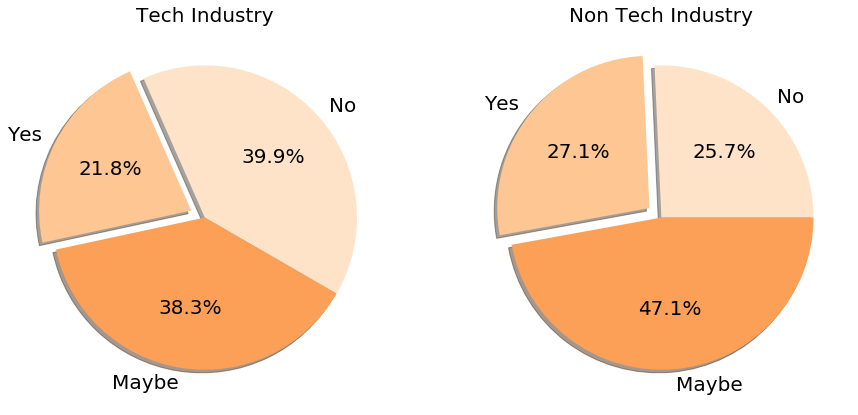

In [168]:
mental_US_tech = mental_US[mental_US.tech_company == 1]
mental_US_nontech = mental_US[mental_US.tech_company == 0]

fig, axs = plt.subplots(1,2, figsize = (15,8))

tech_pie = mental_US_tech.groupby(['mental_health_consequence']).agg({'Gender':'count'})
tech_pie = round(tech_pie/len(tech_pie),2)

nontech_pie = mental_US_nontech.groupby(['mental_health_consequence']).agg({'Gender':'count'})
nontech_pie = round(nontech_pie/len(nontech_pie),2)

plt.sca(axs[0])
plt.pie(tech_pie['Gender'], labels = ['No', 'Yes','Maybe'], explode = [0,0.1,0], shadow=True, startangle=330, autopct='%1.1f%%')
plt.title('Tech Industry', fontsize = 20)

plt.sca(axs[1])
plt.pie(nontech_pie['Gender'], labels = ['No', 'Yes','Maybe'],  explode = [0,0.1,0], shadow=True, autopct='%1.1f%%')
plt.title('Non Tech Industry', fontsize = 20)

#plt.suptitle ('Do you think that discussing a mental health issue with your employer would have negative consequences?', fontsize = 15)
plt.savefig('mental_cons_tech_non.png')

##### Versus Physical Issue

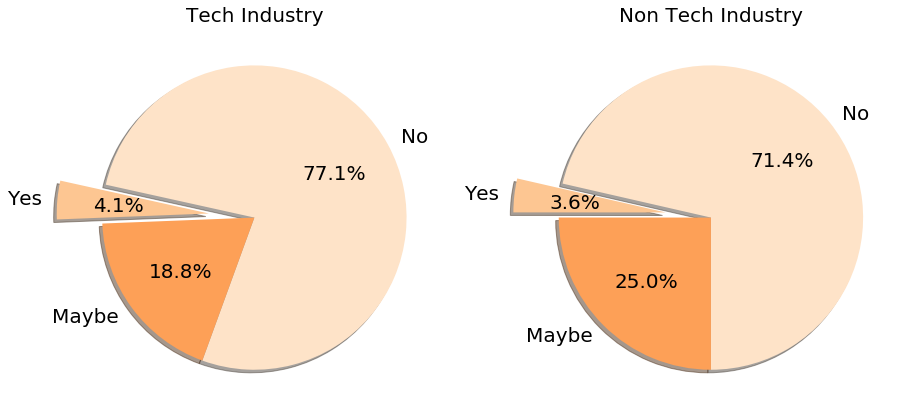

In [169]:
fig, axs = plt.subplots(1,2, figsize = (15,8))

tech_pie = mental_US_tech.groupby(['phys_health_consequence']).agg({'Gender':'count'})
tech_pie = round(tech_pie/len(tech_pie),2)

nontech_pie = mental_US_nontech.groupby(['phys_health_consequence']).agg({'Gender':'count'})
nontech_pie = round(nontech_pie/len(nontech_pie),2)

plt.sca(axs[0])
plt.pie(tech_pie['Gender'], labels = ['No', 'Yes','Maybe'], explode = [0,0.3,0], shadow=True, startangle=250, autopct='%1.1f%%')
plt.title('Tech Industry', fontsize = 20)

plt.sca(axs[1])
plt.pie(nontech_pie['Gender'], labels = ['No', 'Yes','Maybe'],  explode = [0,0.3,0], shadow=True, startangle=270,autopct='%1.1f%%')
plt.title('Non Tech Industry', fontsize = 20)

#plt.suptitle ('Do you think that discussing a physical health issue with your employer would have negative consequences?', fontsize = 16)
plt.savefig('Phys_cons_tech_non.png')

##### Tech Self Employed Versus Non Self Employed

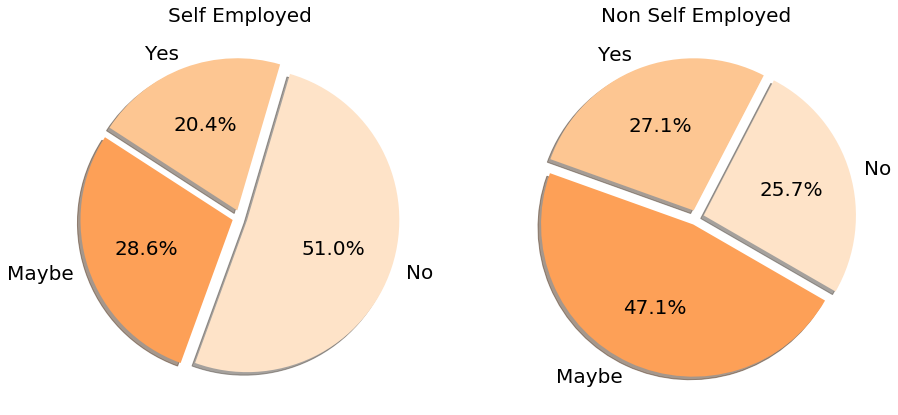

In [170]:
mental_US_tech_selfemp = mental_US_tech.loc[mental_US.self_employed == 1]
mental_US_tech_nonselfemp = mental_US_tech.loc[mental_US.self_employed == 0]

fig, axs = plt.subplots(1,2, figsize = (15,8))

self_pie = mental_US_tech_selfemp.groupby(['mental_health_consequence']).agg({'Gender':'count'})
self_pie = round(self_pie/len(self_pie),2)

nonself_pie = mental_US_nontech.groupby(['mental_health_consequence']).agg({'Gender':'count'})
nonself_pie = round(nonself_pie/len(nonself_pie),2)

plt.sca(axs[0])
plt.pie(self_pie['Gender'], labels = ['No', 'Yes','Maybe'], explode = [0.05,0.05,0.05], shadow=True, startangle=250, autopct='%1.1f%%')
plt.title('Self Employed', fontsize = 20)

plt.sca(axs[1])
plt.pie(nonself_pie['Gender'], labels = ['No', 'Yes','Maybe'],  explode = [0.05,0.05,0.05], shadow=True, startangle=330,autopct='%1.1f%%')
plt.title('Non Self Employed', fontsize = 20)

#plt.suptitle (' Tech Industry Only - Do you think that discussing a mental health issue with your employer would have negative consequences?', fontsize = 16)
plt.savefig('mental_cons_Self_Non.png')

##### Tech Remote versus Non Remote

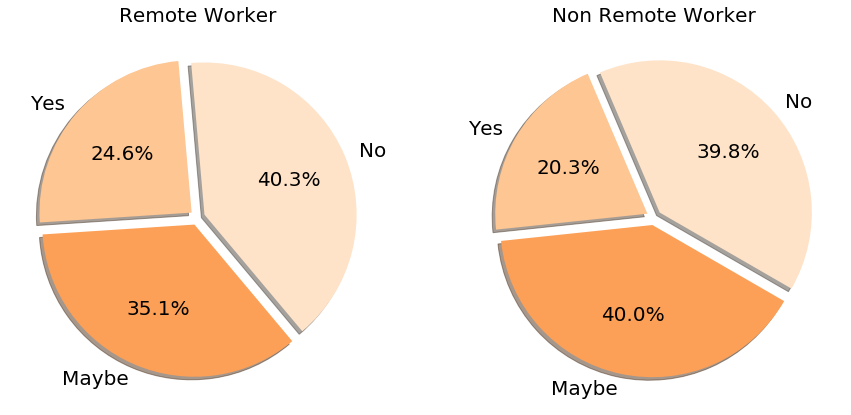

In [171]:
mental_US_tech_rem = mental_US_tech.loc[mental_US.remote_work == 1]
mental_US_tech_nonrem = mental_US_tech.loc[mental_US.remote_work == 0]

fig, axs = plt.subplots(1,2, figsize = (15,8))

rem_pie = mental_US_tech_rem.groupby(['mental_health_consequence']).agg({'Gender':'count'})
rem_pie = round(rem_pie/len(rem_pie),2)

nonrem_pie = mental_US_tech_nonrem.groupby(['mental_health_consequence']).agg({'Gender':'count'})
nonrem_pie = round(nonrem_pie/len(nonrem_pie),2)

plt.sca(axs[0])
plt.pie(rem_pie['Gender'], labels = ['No', 'Yes','Maybe'], explode = [0.05,0.05,0.05], shadow=True, startangle=310, autopct='%1.1f%%')
plt.title('Remote Worker', fontsize = 20)

plt.sca(axs[1])
plt.pie(nonrem_pie['Gender'], labels = ['No', 'Yes','Maybe'],  explode = [0.05,0.05,0.05], shadow=True, startangle=330,autopct='%1.1f%%')
plt.title('Non Remote Worker', fontsize = 20)

#plt.suptitle (' Tech Industry Only - Do you think that discussing a mental health issue with your employer would have negative consequences?', fontsize = 16)
plt.savefig('mental_cons_Remote_non.png')

##### Tech by Side of Company

In [172]:
mental_US_tech_dum = mental_US_tech
mental_US_tech_dum [['No','Yes', 'Maybe']] = pd.get_dummies(mental_US_tech_dum ['mental_health_consequence'])

mental_US_emp = mental_US_tech_dum.groupby('no_employees').agg({ 'No': 'sum','Maybe': 'sum','Yes': 'sum'})
mental_US_emp.reset_index(inplace = True)
mental_US_emp['total'] = mental_US_emp.No + mental_US_emp.Yes + mental_US_emp.Maybe

mental_US_emp.No /= mental_US_emp.total / 100
mental_US_emp.Yes /= mental_US_emp.total / 100
mental_US_emp.Maybe /= mental_US_emp.total / 100

mental_US_emp = mental_US_emp.reindex([0,4,2,1,3,5])
mental_US_emp.reset_index(inplace = True, drop = True)
mental_US_emp.iloc[0,0] = '1-5e'
mental_US_emp

,no_employees,No,Maybe,Yes,total
0,1-5e,44.285714,37.142857,18.571429,70
1,6-25,44.444444,38.888889,16.666667,126
2,26-100,43.478261,35.507246,21.014493,138
3,100-500,37.931034,36.781609,25.287356,87
4,500-1000,40.000000,40.000000,20.000000,30
5,More than 1000,32.500000,41.250000,26.250000,160


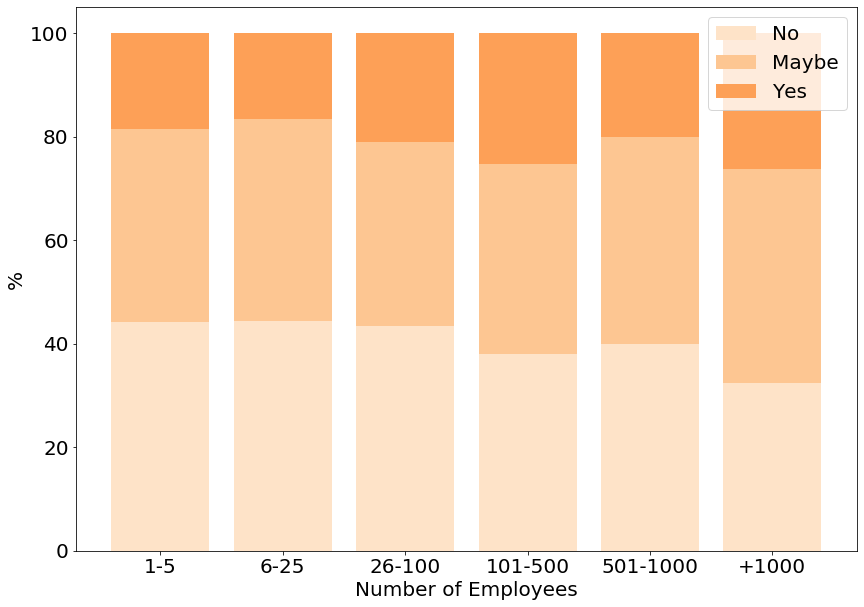

<Figure size 432x288 with 0 Axes>

In [173]:
fig, ax = plt.subplots(1,1, figsize=(14,10))

p1 = plt.bar(mental_US_emp.no_employees,mental_US_emp.No, label = 'No')
p2 = plt.bar(mental_US_emp.no_employees,mental_US_emp.Maybe, bottom = mental_US_emp.No, label = 'Maybe')
p3 = plt.bar(mental_US_emp.no_employees,mental_US_emp.Yes, bottom = mental_US_emp.Maybe + mental_US_emp.No, label = 'Yes')


plt.ylabel('%')
plt.xlabel('Number of Employees')
#plt.title('Answers by Size of Company')
ind = np.arange(6)
plt.xticks(ind, ('1-5', '6-25', '26-100', '101-500', '501-1000', '+1000'))

plt.legend((p1[0], p2[0], p3[0]), ('No', 'Maybe', 'Yes'))

plt.show()
plt.savefig('mental_cons_employess.png')

##### Tech by Age Group

In [174]:
mental_US_tech_dum = mental_US_tech[mental_US_tech.Age > 0]

bins = [18,29,39,100]
mental_US_tech_dum['binned'] = pd.cut(mental_US_tech_dum.Age, bins)

mental_US_tech_dum [['No','Yes', 'Maybe']] = pd.get_dummies(mental_US_tech_dum ['mental_health_consequence'])

mental_US_age = mental_US_tech_dum.groupby('binned').agg({ 'No': 'sum','Maybe': 'sum','Yes': 'sum'})
mental_US_age['total'] = mental_US_age.iloc[:,0:3].sum(axis=1)
mental_US_age.reset_index(inplace = True)

mental_US_age.No /= mental_US_age.total / 100
mental_US_age.Yes /= mental_US_age.total / 100
mental_US_age.Maybe /= mental_US_age.total / 100
mental_US_age.binned = ['18-29 yrs', '30-39 yrs', '40+ yrs']

mental_US_age

/Users/joaoeira/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,binned,No,Maybe,Yes,total
0,18-29 yrs,39.534884,38.604651,21.860465,215
1,30-39 yrs,42.293907,37.634409,20.071685,279
2,40+ yrs,33.636364,40.909091,25.454545,110


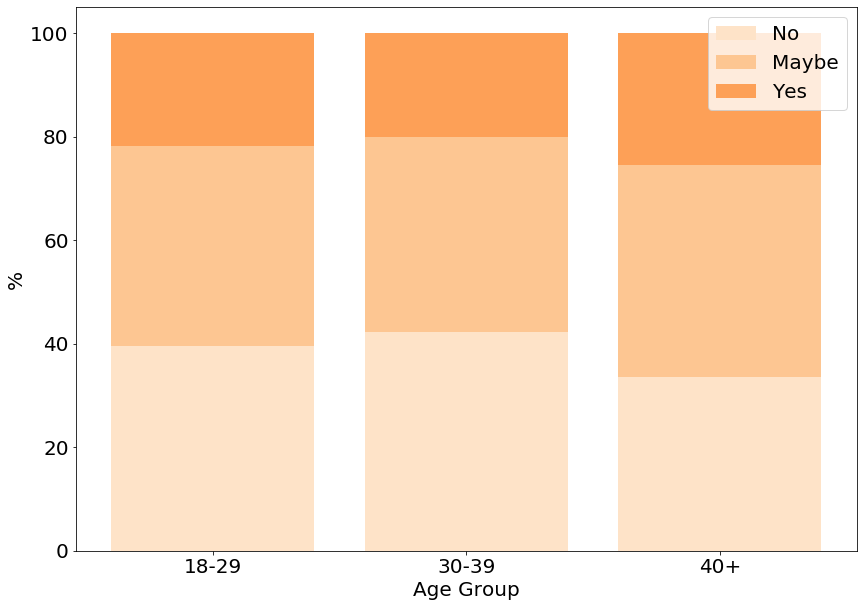

<Figure size 432x288 with 0 Axes>

In [175]:
fig, ax = plt.subplots(1,1, figsize=(14,10))

p1 = plt.bar(mental_US_age.binned,mental_US_age.No, label = 'No')
p2 = plt.bar(mental_US_age.binned,mental_US_age.Maybe, bottom = mental_US_age.No, label = 'Maybe')
p3 = plt.bar(mental_US_age.binned,mental_US_age.Yes, bottom = mental_US_age.Maybe + mental_US_age.No, label = 'Yes')


plt.ylabel('%')
plt.xlabel('Age Group')
#plt.title('Answers by Age of Employee')
ind = np.arange(3)
plt.xticks(ind, ('18-29', '30-39', '40+'))

plt.legend((p1[0], p2[0], p3[0]), ('No', 'Maybe', 'Yes'))

plt.show()
plt.savefig('mental_cons_age.png')

##### Tech by Gender

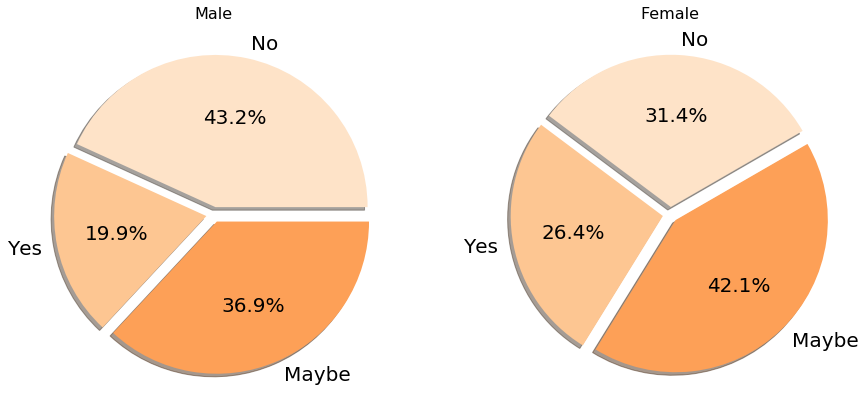

In [176]:
mental_US_tech_m = mental_US_tech.loc[mental_US.Gender == 1]
mental_US_tech_f = mental_US_tech.loc[mental_US.Gender == 0]

fig, axs = plt.subplots(1,2, figsize = (15,8))

male_pie = mental_US_tech_m.groupby(['mental_health_consequence']).agg({'Age':'count'})
female_pie = round(self_pie/len(self_pie),2)

female_pie = mental_US_tech_f.groupby(['mental_health_consequence']).agg({'Age':'count'})
female_pie = round(female_pie/len(female_pie),2)

plt.sca(axs[0])
plt.pie(male_pie['Age'], labels = ['No', 'Yes','Maybe'], explode = [0.05,0.05,0.05], shadow=True, startangle=0, autopct='%1.1f%%')
plt.title('Male', fontsize = 16)

plt.sca(axs[1])
plt.pie(female_pie['Age'], labels = ['No', 'Yes','Maybe'],  explode = [0.05,0.05,0.05], shadow=True, startangle=30,autopct='%1.1f%%')
plt.title('Female', fontsize = 16)

#plt.suptitle (' Tech Industry Only - Do you think that discussing a mental health issue with your employer would have negative consequences?', fontsize = 16)
plt.savefig('mental_cons_gender.png')

#### Do you feel that your employer takes mental health as seriously as physical health?

##### Tech versus Non-Tech

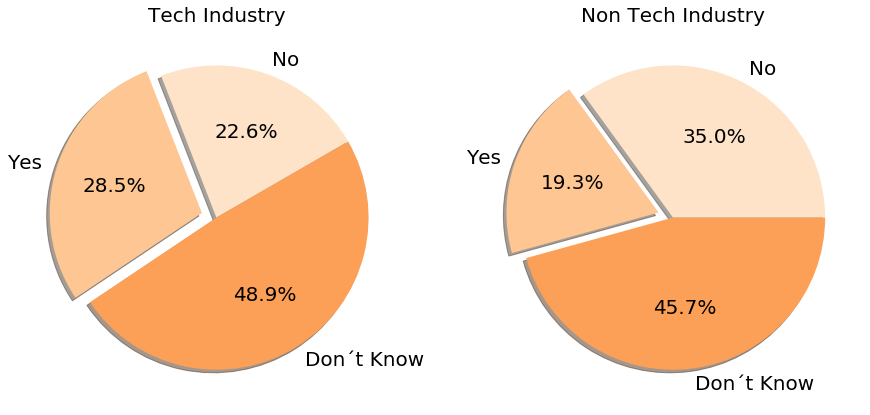

In [177]:
fig, axs = plt.subplots(1,2, figsize = (15,8))

tech_pie = mental_US_tech.groupby(['mental_vs_physical']).agg({'Gender':'count'})
tech_pie = round(tech_pie/len(tech_pie),2)

nontech_pie = mental_US_nontech.groupby(['mental_vs_physical']).agg({'Gender':'count'})
nontech_pie = round(nontech_pie/len(nontech_pie),2)

plt.sca(axs[0])
plt.pie(tech_pie['Gender'], labels = ['No', 'Yes','Don´t Know'], explode = [0,0.1,0], shadow=True, startangle=30, autopct='%1.1f%%')
plt.title('Tech Industry', fontsize = 20)

plt.sca(axs[1])
plt.pie(nontech_pie['Gender'], labels = ['No', 'Yes','Don´t Know'],  explode = [0,0.1,0], shadow=True, autopct='%1.1f%%')
plt.title('Non Tech Industry', fontsize = 20)

#plt.suptitle ('Do you feel that your employer takes mental health as seriously as physical health?', fontsize = 16)
plt.savefig('mentalvephis_tech_non.png')

##### Tech Self Employed Versus Non Self Employed

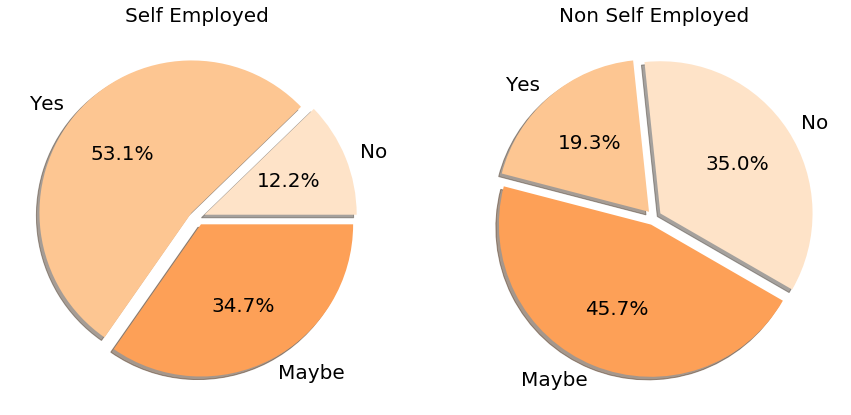

In [178]:
mental_US_tech_selfemp = mental_US_tech.loc[mental_US.self_employed == 1]
mental_US_tech_nonselfemp = mental_US_tech.loc[mental_US.self_employed == 0]

fig, axs = plt.subplots(1,2, figsize = (15,8))

self_pie = mental_US_tech_selfemp.groupby(['mental_vs_physical']).agg({'Gender':'count'})
self_pie = round(self_pie/len(self_pie),2)

nonself_pie = mental_US_nontech.groupby(['mental_vs_physical']).agg({'Gender':'count'})
nonself_pie = round(nonself_pie/len(nonself_pie),2)

plt.sca(axs[0])
plt.pie(self_pie['Gender'], labels = ['No', 'Yes','Maybe'], explode = [0.05,0.05,0.05], shadow=True, startangle=0, autopct='%1.1f%%')
plt.title('Self Employed', fontsize = 20)

plt.sca(axs[1])
plt.pie(nonself_pie['Gender'], labels = ['No', 'Yes','Maybe'],  explode = [0.05,0.05,0.05], shadow=True, startangle=330,autopct='%1.1f%%')
plt.title('Non Self Employed', fontsize = 20)

#plt.suptitle (' Tech Industry Only - Do you feel that your employer takes mental health as seriously as physical health??', fontsize = 16)
plt.savefig('mentalvephis_Self_Non.png')

##### Tech Remote versus Non Remote

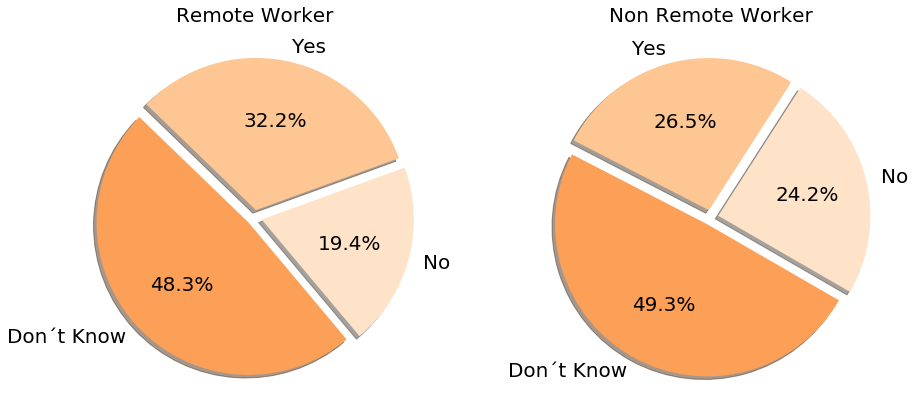

In [179]:
mental_US_tech_rem = mental_US_tech.loc[mental_US.remote_work == 1]
mental_US_tech_nonrem = mental_US_tech.loc[mental_US.remote_work == 0]

fig, axs = plt.subplots(1,2, figsize = (15,8))

rem_pie = mental_US_tech_rem.groupby(['mental_vs_physical']).agg({'Gender':'count'})
rem_pie = round(rem_pie/len(rem_pie),2)

nonrem_pie = mental_US_tech_nonrem.groupby(['mental_vs_physical']).agg({'Gender':'count'})
nonrem_pie = round(nonrem_pie/len(nonrem_pie),2)

plt.sca(axs[0])
plt.pie(rem_pie['Gender'], labels = ['No', 'Yes','Don´t Know'], explode = [0.05,0.05,0.05], shadow=True, startangle=310, autopct='%1.1f%%')
plt.title('Remote Worker', fontsize = 20)

plt.sca(axs[1])
plt.pie(nonrem_pie['Gender'], labels = ['No', 'Yes','Don´t Know'],  explode = [0.05,0.05,0.05], shadow=True, startangle=330,autopct='%1.1f%%')
plt.title('Non Remote Worker', fontsize = 20)

#plt.suptitle (' Tech Industry Only - Do you feel that your employer takes mental health as seriously as physical health?', fontsize = 16)
plt.savefig('mentalvephis_non.png')

##### Tech by Side of Company

In [180]:
mental_US_tech_dum = mental_US_tech
mental_US_tech_dum [['No','Yes', 'Maybe']] = pd.get_dummies(mental_US_tech_dum ['mental_vs_physical'])

mental_US_emp = mental_US_tech_dum.groupby('no_employees').agg({ 'No': 'sum','Maybe': 'sum','Yes': 'sum'})
mental_US_emp.reset_index(inplace = True)
mental_US_emp['total'] = mental_US_emp.No + mental_US_emp.Yes + mental_US_emp.Maybe

mental_US_emp.No /= mental_US_emp.total / 100
mental_US_emp.Yes /= mental_US_emp.total / 100
mental_US_emp.Maybe /= mental_US_emp.total / 100

mental_US_emp = mental_US_emp.reindex([0,4,2,1,3,5])
mental_US_emp.reset_index(inplace = True, drop = True)
mental_US_emp.iloc[0,0] = '1-5e'
mental_US_emp

,no_employees,No,Maybe,Yes,total
0,1-5e,15.714286,40.000000,44.285714,70
1,6-25,15.873016,55.555556,28.571429,126
2,26-100,24.637681,53.623188,21.739130,138
3,100-500,26.436782,51.724138,21.839080,87
4,500-1000,20.000000,40.000000,40.000000,30
5,More than 1000,27.500000,43.750000,28.750000,160


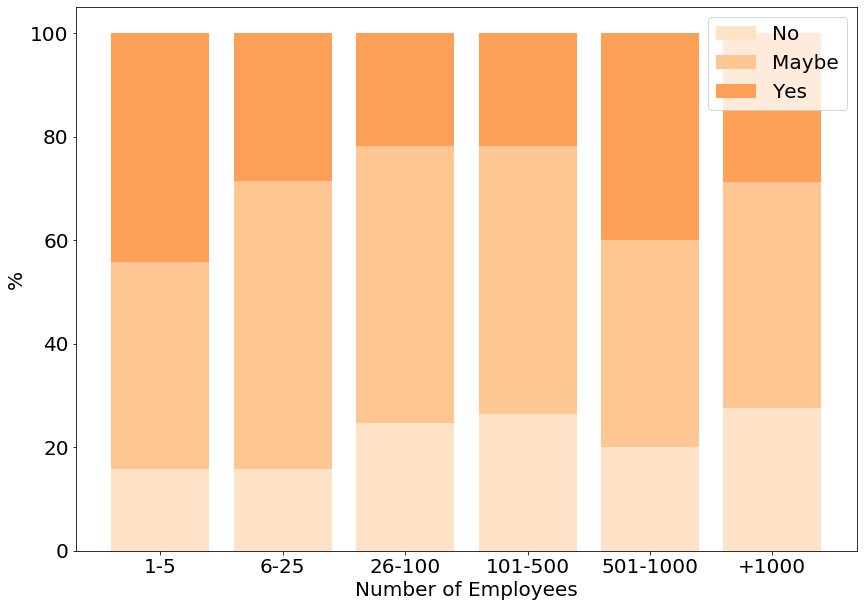

<Figure size 432x288 with 0 Axes>

In [181]:
fig, ax = plt.subplots(1,1, figsize=(14,10))

p1 = plt.bar(mental_US_emp.no_employees,mental_US_emp.No, label = 'No')
p2 = plt.bar(mental_US_emp.no_employees,mental_US_emp.Maybe, bottom = mental_US_emp.No, label = 'Maybe')
p3 = plt.bar(mental_US_emp.no_employees,mental_US_emp.Yes, bottom = mental_US_emp.Maybe + mental_US_emp.No, label = 'Yes')


plt.ylabel('%')
plt.xlabel('Number of Employees')
#plt.title('Answers by Size of Company')
ind = np.arange(6)
plt.xticks(ind, ('1-5', '6-25', '26-100', '101-500', '501-1000', '+1000'))

plt.legend((p1[0], p2[0], p3[0]), ('No', 'Maybe', 'Yes'))

plt.show()
plt.savefig('mentalvephis_employess.png')

##### Tech by Age Group

In [182]:
mental_US_tech_dum = mental_US_tech[mental_US_tech.Age > 0]

bins = [18,29,39,100]
mental_US_tech_dum['binned'] = pd.cut(mental_US_tech_dum.Age, bins)

mental_US_tech_dum [['No','Yes', 'Maybe']] = pd.get_dummies(mental_US_tech_dum ['mental_vs_physical'])

mental_US_age = mental_US_tech_dum.groupby('binned').agg({ 'No': 'sum','Maybe': 'sum','Yes': 'sum'})
mental_US_age['total'] = mental_US_age.iloc[:,0:3].sum(axis=1)
mental_US_age.reset_index(inplace = True)

mental_US_age.No /= mental_US_age.total / 100
mental_US_age.Yes /= mental_US_age.total / 100
mental_US_age.Maybe /= mental_US_age.total / 100
mental_US_age.binned = ['18-29 yrs', '30-39 yrs', '40+ yrs']

mental_US_age

/Users/joaoeira/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,binned,No,Maybe,Yes,total
0,18-29 yrs,27.906977,46.976744,25.116279,215
1,30-39 yrs,18.637993,51.971326,29.390681,279
2,40+ yrs,22.727273,46.363636,30.909091,110


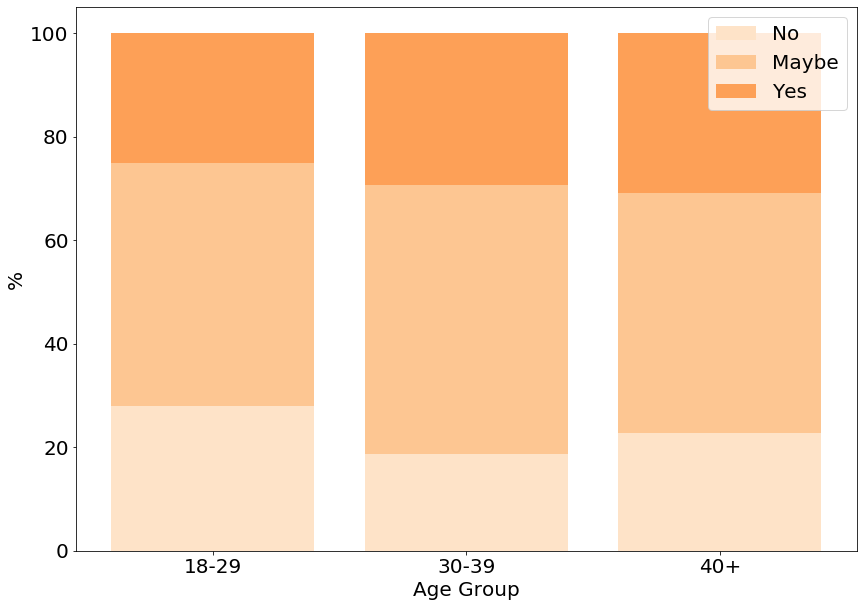

<Figure size 432x288 with 0 Axes>

In [183]:
fig, ax = plt.subplots(1,1, figsize=(14,10))

p1 = plt.bar(mental_US_age.binned,mental_US_age.No, label = 'No')
p2 = plt.bar(mental_US_age.binned,mental_US_age.Maybe, bottom = mental_US_age.No, label = 'Maybe')
p3 = plt.bar(mental_US_age.binned,mental_US_age.Yes, bottom = mental_US_age.Maybe + mental_US_age.No, label = 'Yes')


plt.ylabel('%')
plt.xlabel('Age Group')
#plt.title('Answers by Age of Employee')
ind = np.arange(3)
plt.xticks(ind, ('18-29', '30-39', '40+'))

plt.legend((p1[0], p2[0], p3[0]), ('No', 'Maybe', 'Yes'))

plt.show()
plt.savefig('mentalvephis_age.png')

##### Tech by Gender

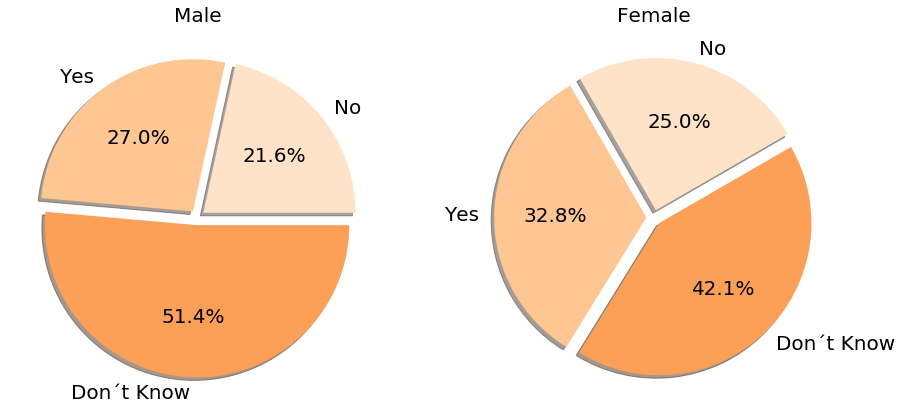

In [184]:
mental_US_tech_m = mental_US_tech.loc[mental_US.Gender == 1]
mental_US_tech_f = mental_US_tech.loc[mental_US.Gender == 0]

fig, axs = plt.subplots(1,2, figsize = (15,8))

male_pie = mental_US_tech_m.groupby(['mental_vs_physical']).agg({'Age':'count'})
female_pie = round(self_pie/len(self_pie),2)

female_pie = mental_US_tech_f.groupby(['mental_vs_physical']).agg({'Age':'count'})
female_pie = round(female_pie/len(female_pie),2)

plt.sca(axs[0])
plt.pie(male_pie['Age'], labels = ['No', 'Yes','Don´t Know'], explode = [0.05,0.05,0.05], shadow=True, startangle=0, autopct='%1.1f%%')
plt.title('Male', fontsize = 20)

plt.sca(axs[1])
plt.pie(female_pie['Age'], labels = ['No', 'Yes','Don´t Know'],  explode = [0.05,0.05,0.05], shadow=True, startangle=30,autopct='%1.1f%%')
plt.title('Female', fontsize = 20)

#plt.suptitle (' Tech Industry Only - Do you feel that your employer takes mental health as seriously as physical health?', fontsize = 16)
plt.savefig('mentalvephis_gender.png')

#### Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

##### Tech versus Non-Tech

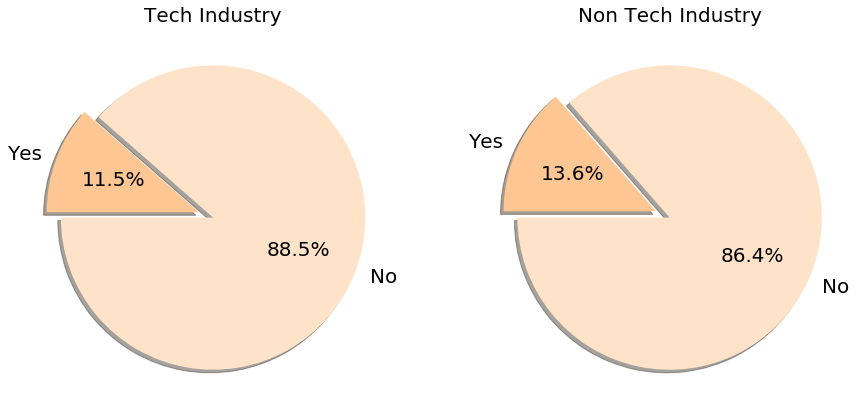

In [185]:
fig, axs = plt.subplots(1,2, figsize = (15,8))

tech_pie = mental_US_tech.groupby(['obs_consequence']).agg({'Gender':'count'})
tech_pie = round(tech_pie/len(tech_pie),2)

nontech_pie = mental_US_nontech.groupby(['obs_consequence']).agg({'Gender':'count'})
nontech_pie = round(nontech_pie/len(nontech_pie),2)

plt.sca(axs[0])
plt.pie(tech_pie['Gender'], labels = ['No', 'Yes'], explode = [0,0.1], shadow=True, startangle=180, autopct='%1.1f%%')
plt.title('Tech Industry', fontsize = 20)

plt.sca(axs[1])
plt.pie(nontech_pie['Gender'], labels = ['No', 'Yes'],  explode = [0,0.1], startangle=180, shadow=True, autopct='%1.1f%%')
plt.title('Non Tech Industry', fontsize = 20)

#plt.suptitle ('Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?', fontsize = 16)
plt.savefig('obscon_tech_non.png')

##### Tech Self Employed Versus Non Self Employed

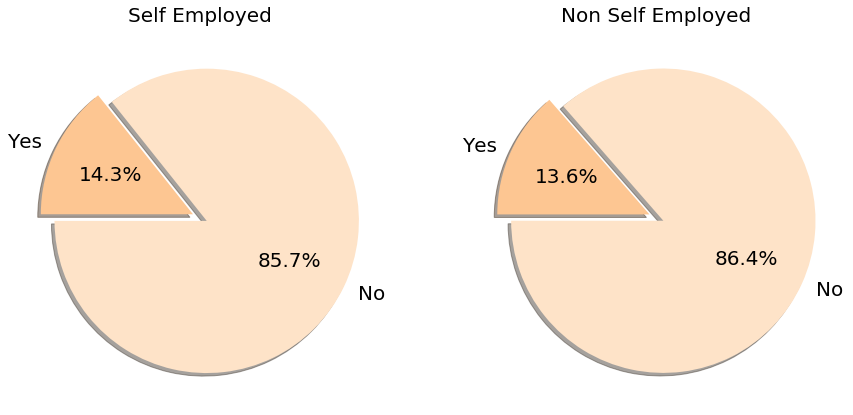

In [186]:
mental_US_tech_selfemp = mental_US_tech.loc[mental_US.self_employed == 1]
mental_US_tech_nonselfemp = mental_US_tech.loc[mental_US.self_employed == 0]

fig, axs = plt.subplots(1,2, figsize = (15,8))

self_pie = mental_US_tech_selfemp.groupby(['obs_consequence']).agg({'Gender':'count'})
self_pie = round(self_pie/len(self_pie),2)

nonself_pie = mental_US_nontech.groupby(['obs_consequence']).agg({'Gender':'count'})
nonself_pie = round(nonself_pie/len(nonself_pie),2)

plt.sca(axs[0])
plt.pie(self_pie['Gender'], labels = ['No', 'Yes'], explode = [0.05,0.05], shadow=True, startangle=180, autopct='%1.1f%%')
plt.title('Self Employed', fontsize = 20)

plt.sca(axs[1])
plt.pie(nonself_pie['Gender'], labels = ['No', 'Yes'],  explode = [0.05,0.05], shadow=True, startangle=180,autopct='%1.1f%%')
plt.title('Non Self Employed', fontsize = 20)

#plt.suptitle (' Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?', fontsize = 16)
plt.savefig('obscon_Self_Non.png')

##### Tech Remote versus Non Remote

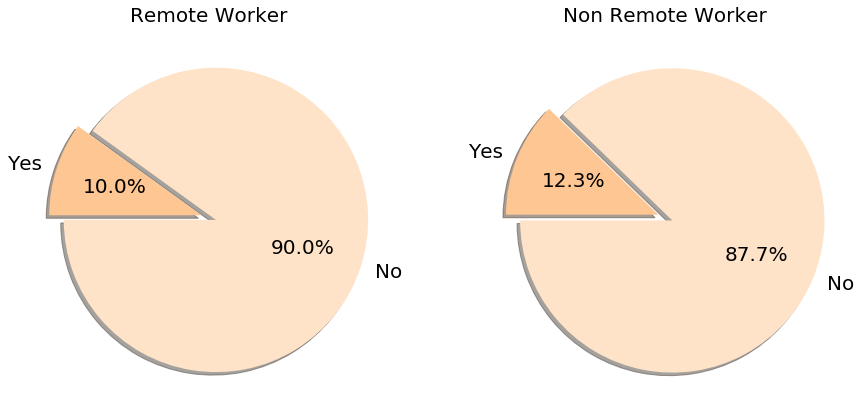

In [187]:
mental_US_tech_rem = mental_US_tech.loc[mental_US.remote_work == 1]
mental_US_tech_nonrem = mental_US_tech.loc[mental_US.remote_work == 0]

fig, axs = plt.subplots(1,2, figsize = (15,8))

rem_pie = mental_US_tech_rem.groupby(['obs_consequence']).agg({'Gender':'count'})
rem_pie = round(rem_pie/len(rem_pie),2)

nonrem_pie = mental_US_tech_nonrem.groupby(['obs_consequence']).agg({'Gender':'count'})
nonrem_pie = round(nonrem_pie/len(nonrem_pie),2)

plt.sca(axs[0])
plt.pie(rem_pie['Gender'], labels = ['No', 'Yes'], explode = [0.05,0.05], shadow=True, startangle=180, autopct='%1.1f%%')
plt.title('Remote Worker', fontsize = 20)

plt.sca(axs[1])
plt.pie(nonrem_pie['Gender'], labels = ['No', 'Yes'],  explode = [0.05,0.05], shadow=True, startangle=180,autopct='%1.1f%%')
plt.title('Non Remote Worker', fontsize = 20)

#plt.suptitle (' Tech Industry Only - Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?', fontsize = 16)
plt.savefig('obscon_non.png')

##### Tech by Side of Company

In [188]:
mental_US_tech_dum = mental_US_tech
mental_US_tech_dum [['No','Yes']] = pd.get_dummies(mental_US_tech_dum ['obs_consequence'])

mental_US_emp = mental_US_tech_dum.groupby('no_employees').agg({ 'No': 'sum','Yes': 'sum'})
mental_US_emp.reset_index(inplace = True)
mental_US_emp['total'] = mental_US_emp.No + mental_US_emp.Yes 

mental_US_emp.No /= mental_US_emp.total / 100
mental_US_emp.Yes /= mental_US_emp.total / 100

mental_US_emp = mental_US_emp.reindex([0,4,2,1,3,5])
mental_US_emp.reset_index(inplace = True, drop = True)
mental_US_emp.iloc[0,0] = '1-5e'
mental_US_emp

,no_employees,No,Yes,total
0,1-5e,85.714286,14.285714,70
1,6-25,95.238095,4.761905,126
2,26-100,86.956522,13.043478,138
3,100-500,90.804598,9.195402,87
4,500-1000,93.333333,6.666667,30
5,More than 1000,83.750000,16.250000,160


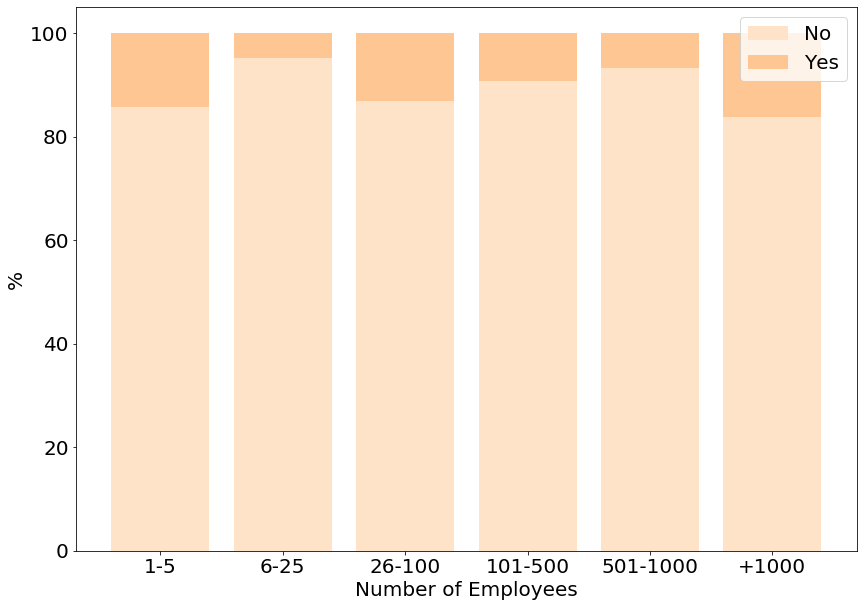

<Figure size 432x288 with 0 Axes>

In [189]:
fig, ax = plt.subplots(1,1, figsize=(14,10))

p1 = plt.bar(mental_US_emp.no_employees,mental_US_emp.No, label = 'No')
p3 = plt.bar(mental_US_emp.no_employees,mental_US_emp.Yes, bottom = mental_US_emp.No, label = 'Yes')


plt.ylabel('%')
plt.xlabel('Number of Employees')
#plt.title('Answers by Size of Company')
ind = np.arange(6)
plt.xticks(ind, ('1-5', '6-25', '26-100', '101-500', '501-1000', '+1000'))

plt.legend((p1[0], p3[0]), ('No', 'Yes'))

plt.show()
plt.savefig('obscon_employess.png')

##### Tech by Age Group

In [190]:
mental_US_tech_dum = mental_US_tech[mental_US_tech.Age > 0]

bins = [18,29,39,100]
mental_US_tech_dum['binned'] = pd.cut(mental_US_tech_dum.Age, bins)

mental_US_tech_dum [['No','Yes']] = pd.get_dummies(mental_US_tech_dum ['obs_consequence'])

mental_US_age = mental_US_tech_dum.groupby('binned').agg({ 'No': 'sum','Yes': 'sum'})
mental_US_age['total'] = mental_US_age.iloc[:,0:2].sum(axis=1)
mental_US_age.reset_index(inplace = True)

mental_US_age.No /= mental_US_age.total / 100
mental_US_age.Yes /= mental_US_age.total / 100
mental_US_age.binned = ['18-29 yrs', '30-39 yrs', '40+ yrs']

mental_US_age

/Users/joaoeira/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,binned,No,Yes,total
0,18-29 yrs,86.046512,13.953488,215.0
1,30-39 yrs,92.473118,7.526882,279.0
2,40+ yrs,83.636364,16.363636,110.0


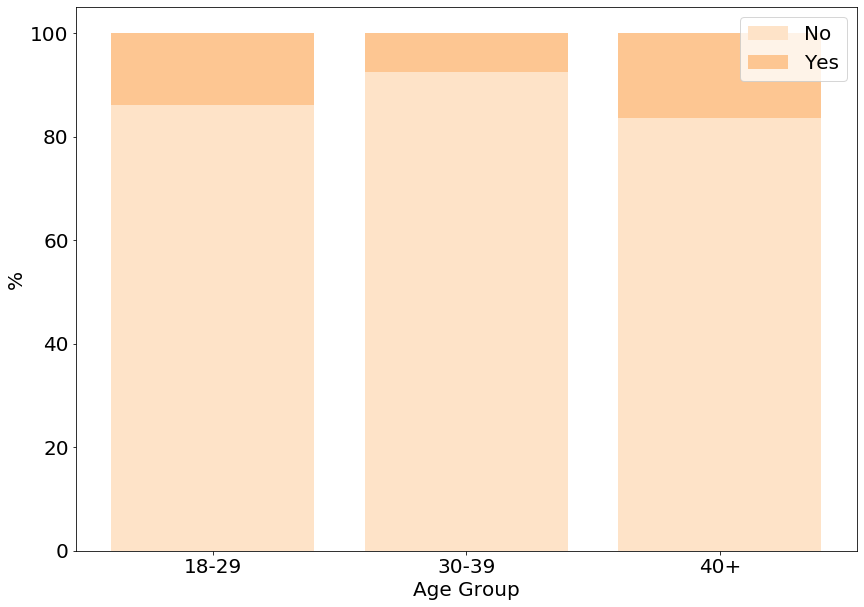

<Figure size 432x288 with 0 Axes>

In [191]:
fig, ax = plt.subplots(1,1, figsize=(14,10))

p1 = plt.bar(mental_US_age.binned,mental_US_age.No, label = 'No')
p3 = plt.bar(mental_US_age.binned,mental_US_age.Yes, bottom =  mental_US_age.No, label = 'Yes')


plt.ylabel('%')
plt.xlabel('Age Group')
#plt.title('Answers by Age of Employee')
ind = np.arange(3)
plt.xticks(ind, ('18-29', '30-39', '40+'))

plt.legend((p1[0],  p3[0]), ('No',  'Yes'))

plt.show()
plt.savefig('obscon_age.png')

##### Tech by Gender

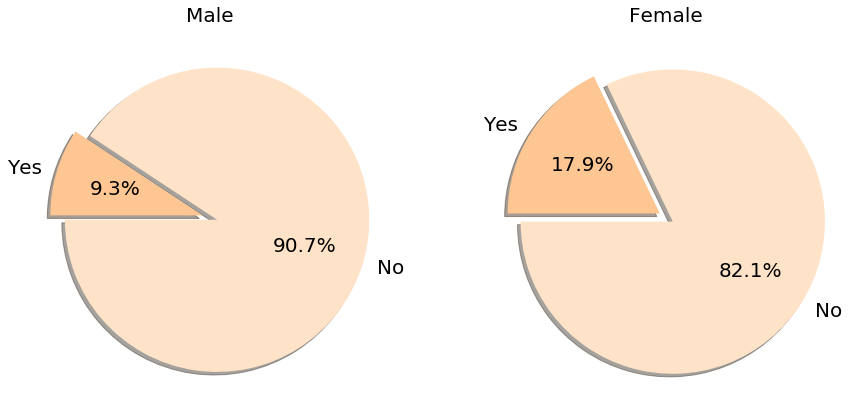

In [192]:
mental_US_tech_m = mental_US_tech.loc[mental_US.Gender == 1]
mental_US_tech_f = mental_US_tech.loc[mental_US.Gender == 0]

fig, axs = plt.subplots(1,2, figsize = (15,8))

male_pie = mental_US_tech_m.groupby(['obs_consequence']).agg({'Age':'count'})
female_pie = round(self_pie/len(self_pie),2)

female_pie = mental_US_tech_f.groupby(['obs_consequence']).agg({'Age':'count'})
female_pie = round(female_pie/len(female_pie),2)

plt.sca(axs[0])
plt.pie(male_pie['Age'], labels = ['No', 'Yes'], explode = [0.05,0.05], shadow=True, startangle=180, autopct='%1.1f%%')
plt.title('Male', fontsize = 20)

plt.sca(axs[1])
plt.pie(female_pie['Age'], labels = ['No', 'Yes'],  explode = [0.05,0.05], shadow=True, startangle=180,autopct='%1.1f%%')
plt.title('Female', fontsize = 20)

#plt.suptitle (' Tech Industry Only - Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace??', fontsize = 16)
plt.savefig('obscon_gender.png')